# Is it a bird?

In [1]:
from fastbook import *
from pprint import pprint
import random
from PIL import Image as PILImage
from IPython.display import Image, display

In [2]:
from parseimagenet import get_image_paths_by_keywords
from parseimagenet import get_available_presets, get_synset_mapping, KEYWORD_PRESETS
!pip show parseimagenet

Name: parseimagenet
Version: 1.2.0
Summary: Extract ImageNet image paths by category keywords
Home-page: https://github.com/MrT3313/Parse-ImageNet
Author: 
Author-email: Reed Turgeon <turgeon.dev@gmail.com>
License: MIT
Location: /opt/homebrew/Caskroom/miniconda/base/envs/FastAI/lib/python3.12/site-packages
Editable project location: /Users/mrt/Documents/MrT/code/computer-vision/ParseImageNet
Requires: 
Required-by: 


In [3]:
# Set the path to your ImageNet directory
base_path = Path('/Users/mrt/Documents/MrT/code/computer-vision/image-bank/ImageNet-Subset')

## Get Images

In [4]:
number_of_images = 400
bird_image_paths = get_image_paths_by_keywords(
    base_path=base_path,
    preset="birds",
    num_images=number_of_images
)
print(f'{len(bird_image_paths)} Bird Images')
pprint(bird_image_paths[:2])

print("")

dog_image_paths = get_image_paths_by_keywords(
    base_path=base_path,
    preset="dogs",
    num_images=number_of_images
)
print(f'{len(dog_image_paths)} Dog Images')
pprint(dog_image_paths[:2])

print("")

snake_image_paths = get_image_paths_by_keywords(
    base_path=base_path,
    preset="snakes",
    num_images=1
)
print(f'{len(snake_image_paths)} Snake Images')
pprint(snake_image_paths[0])

400 Bird Images
[Path('/Users/mrt/Documents/MrT/code/computer-vision/image-bank/ImageNet-Subset/ILSVRC/Data/CLS-LOC/train/n01582220/n01582220_220.JPEG'),
 Path('/Users/mrt/Documents/MrT/code/computer-vision/image-bank/ImageNet-Subset/ILSVRC/Data/CLS-LOC/train/n01518878/n01518878_3505.JPEG')]

400 Dog Images
[Path('/Users/mrt/Documents/MrT/code/computer-vision/image-bank/ImageNet-Subset/ILSVRC/Data/CLS-LOC/train/n02105056/n02105056_10545.JPEG'),
 Path('/Users/mrt/Documents/MrT/code/computer-vision/image-bank/ImageNet-Subset/ILSVRC/Data/CLS-LOC/train/n02107683/n02107683_323.JPEG')]

1 Snake Images
Path('/Users/mrt/Documents/MrT/code/computer-vision/image-bank/ImageNet-Subset/ILSVRC/Data/CLS-LOC/train/n01739381/n01739381_7538.JPEG')


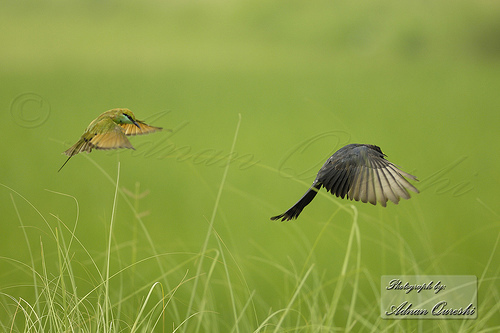

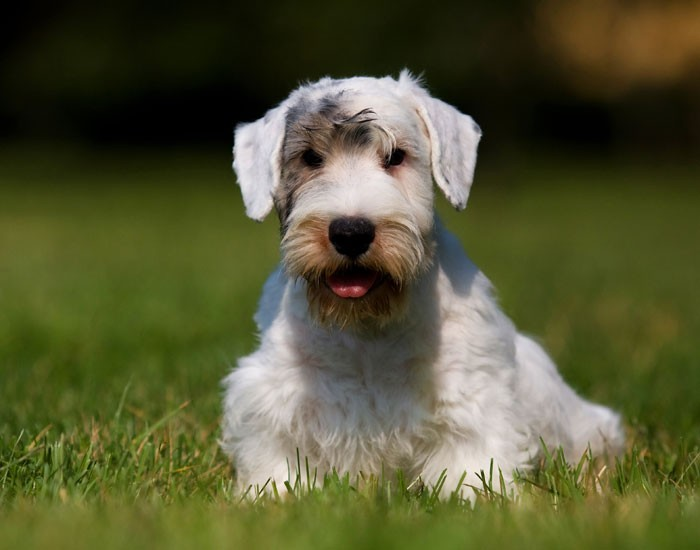

In [5]:
random_bird_index = random.randrange(len(bird_image_paths))
display(Image(filename=bird_image_paths[random_bird_index]))

random_dog_index = random.randrange(len(dog_image_paths))
display(Image(filename=dog_image_paths[random_dog_index]))

# Create Data Block
Data Block Description: https://youtu.be/8SF_h3xF3cE?t=2505

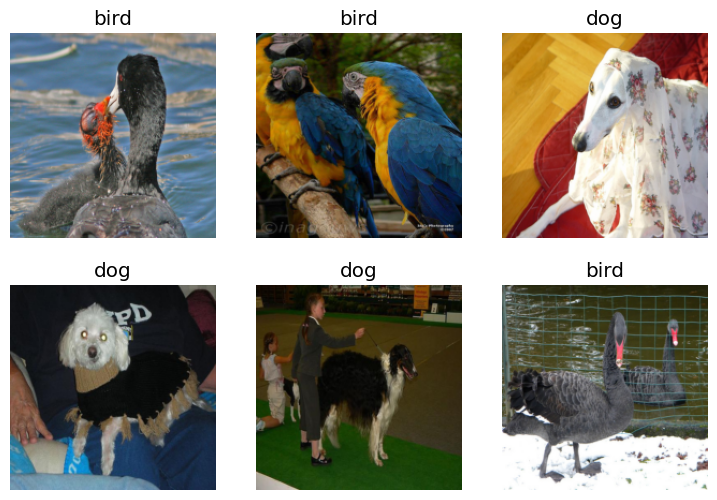

In [6]:
synset_map = get_synset_mapping(base_path)

def wnid_to_label(path):
      desc = synset_map[parent_label(path)].lower()
      if any(kw.lower() in desc for kw in KEYWORD_PRESETS["birds"]):
          return "bird"
      elif any(kw.lower() in desc for kw in KEYWORD_PRESETS["dogs"]):
          return "dog"
      return "unknown"

# DATA BLOCK
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=wnid_to_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(bird_image_paths + dog_image_paths)

dls.show_batch(max_n=6)

# Train Model

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.remove_cb(ProgressCallback) # getting errors w/ progress output
learn.fine_tune(3)

# epoch | train_loss | valid_loss | error_rate | time

[0, 0.6066240072250366, 0.061923541128635406, 0.01875000074505806, '00:02']
[0, 0.12403339147567749, 0.06258130818605423, 0.01875000074505806, '00:02']
[1, 0.08719219267368317, 0.054590750485658646, 0.012500000186264515, '00:02']
[2, 0.05934059992432594, 0.0628511980175972, 0.012500000186264515, '00:02']


# Predict

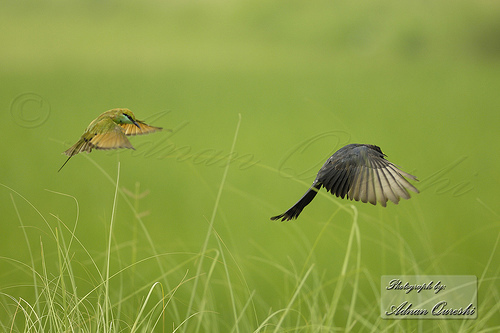

This is a: bird
Probability it's a bird: 1.0000
tensor(0)
tensor([1.0000e+00, 3.2081e-07])


In [8]:
# MODEL TRAINED ON DOGS & BIRDS
bird_img_path_to_predict = bird_image_paths[random_bird_index]
display(Image(filename=bird_img_path_to_predict))

is_bird, _bird, probs_bird_input = learn.predict(bird_img_path_to_predict)
print(f'This is a: {is_bird}')
print(f"Probability it's a bird: {probs_bird_input[0]:.4f}")
pprint(_bird)
pprint(probs_bird_input)

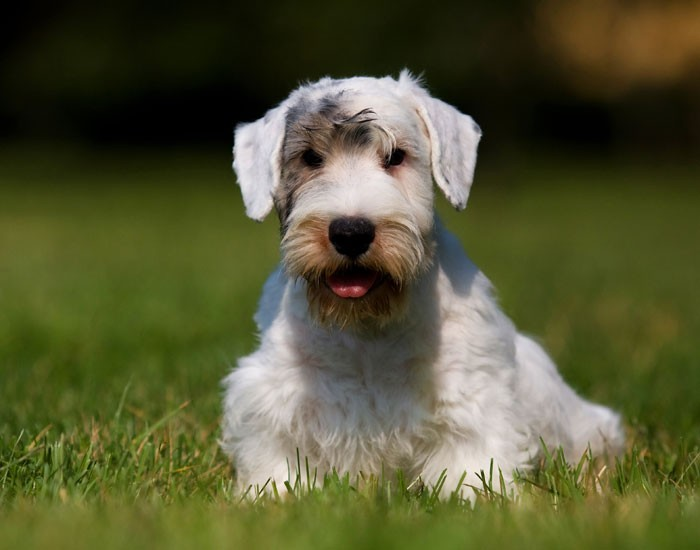

This is a: dog
Probability it's a bird: 0.0000
tensor(1)
tensor([3.8353e-07, 1.0000e+00])


In [9]:
# MODEL TRAINED ON DOGS & BIRDS
dog_img_path_to_predict = dog_image_paths[random_dog_index]
display(Image(filename=dog_img_path_to_predict))

is_dog, _dog, probs_dog_input = learn.predict(dog_img_path_to_predict)
print(f'This is a: {is_dog}')
print(f"Probability it's a bird: {probs_dog_input[0]:.4f}")
pprint(_dog)
pprint(probs_dog_input)

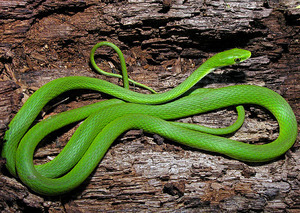

This is a: bird
Probability it's a bird: 0.7736
tensor(0)
tensor([0.7736, 0.2264])


In [10]:
# MODEL HAS NO IDEA WHAT A SNAKE IS!
snake_img_path_to_predict = snake_image_paths[0]
display(Image(filename=snake_img_path_to_predict))

is_snake, _snake, probs_snake_input = learn.predict(snake_img_path_to_predict)
print(f'This is a: {is_snake}')
print(f"Probability it's a bird: {probs_snake_input[0]:.4f}")
pprint(_snake)
pprint(probs_snake_input)